## CS 436 Project - Week 2 Milestone

In [4]:
!unzip "/content/CS436-Proj.zip"

Archive:  /content/CS436-Proj.zip
  inflating: CS436-Proj/3D_point_cloud.ply  
   creating: CS436-Proj/data/
   creating: CS436-Proj/data/bed_corner/
  inflating: CS436-Proj/data/bed_corner/img_012.jpeg  
  inflating: CS436-Proj/data/bed_corner/img_013.jpeg  
  inflating: CS436-Proj/data/bed_corner/img_014.jpeg  
  inflating: CS436-Proj/data/bed_corner/img_015.jpeg  
  inflating: CS436-Proj/data/bed_corner/img_016.jpeg  
  inflating: CS436-Proj/data/bed_corner/img_017.jpeg  
  inflating: CS436-Proj/data/bed_corner/img_018.jpeg  
  inflating: CS436-Proj/data/bed_corner/img_019.jpeg  
  inflating: CS436-Proj/data/bed_corner/img_020.jpeg  
  inflating: CS436-Proj/data/bed_corner/img_021.jpeg  
  inflating: CS436-Proj/data/bed_corner/img_022.jpeg  
  inflating: CS436-Proj/data/bed_corner/img_023.jpeg  
   creating: CS436-Proj/data/blackboard_corner/
  inflating: CS436-Proj/data/blackboard_corner/img_024.jpeg  
  inflating: CS436-Proj/data/blackboard_corner/img_025.jpeg  
  inflating: CS436

In [9]:
import sys
sys.path.append('/content/CS436-Proj/')

In [10]:
import cv2
import numpy as np
from feature_matching import match_pairs

In [34]:
img = cv2.imread("/content/CS436-Proj/data/bookshelf_corner/img_005.jpeg")
h, w = img.shape[:2]

f_mm = 27
sensor_w_mm = 7.36
sensor_h_mm = 5.52

fx = f_mm * w / sensor_w_mm
fy = f_mm * h / sensor_h_mm
cx = w / 2
cy = h / 2

K = np.array([[fx, 0, cx],
              [0, fy, cy],
              [0, 0, 1]])
print("Intrinsic matrix K:\n", K)


Intrinsic matrix K:
 [[5.86956522e+03 0.00000000e+00 8.00000000e+02]
 [0.00000000e+00 5.86956522e+03 6.00000000e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [35]:
image_paths = ["/content/CS436-Proj/data/bookshelf_corner/img_005.jpeg", "/content/CS436-Proj/data/bookshelf_corner/img_006.jpeg"]
match_results , matched_pts= match_pairs(image_paths, 1)

In [36]:
pts1, pts2 = matched_pts[0]
E, mask = cv2.findEssentialMat(pts1, pts2, K, method=cv2.RANSAC, prob=0.999, threshold=1.0)
inliers1 = pts1[mask.ravel() == 1]
inliers2 = pts2[mask.ravel() == 1]
_, R, t, mask_pose = cv2.recoverPose(E, inliers1, inliers2, K)

print("Rotation R:\n", R)
print("Translation t:\n", t)

Rotation R:
 [[ 0.99793347 -0.05842215 -0.02675142]
 [ 0.06217707  0.77294907  0.63141408]
 [-0.01621108 -0.63177257  0.77498427]]
Translation t:
 [[ 0.05249848]
 [-0.92092899]
 [ 0.38617833]]


In [37]:
inliers1.shape

(621, 2)

In [38]:

Rt = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0]])
camera_1 = K @ Rt

camera_2 = K @ np.hstack((R, t))

points_4D = cv2.triangulatePoints( camera_1, camera_2, inliers1.T, inliers2.T )

triangulated_points_3D = points_4D[:3,:] / points_4D[-1,:]

print("Triangulated 3D points: \n", triangulated_points_3D)

Triangulated 3D points: 
 [[-0.15745404 -0.15104856 -0.15087245 ... -0.01062411 -0.01044361
  -0.00470435]
 [ 0.03931774  0.04841765  0.04921568 ...  0.12962796  0.1150578
   0.13964404]
 [ 1.4183831   1.4225773   1.4231024  ...  1.4544474   1.4569751
   1.4587526 ]]


In [39]:
print(triangulated_points_3D[-1:,])

[[1.4183831 1.4225773 1.4231024 1.4215293 1.4322537 1.4322412 1.4214816
  1.433536  1.4324303 1.4013922 1.4217285 1.4008144 1.4397141 1.4330146
  1.4326888 1.4214445 1.4332418 1.4393786 1.4389931 1.4342741 1.401723
  1.4221056 1.4222614 1.4351875 1.3989551 1.4010237 1.401361  1.4354478
  1.440006  1.4373403 1.4354521 1.4007624 1.4328994 1.4356242 1.4371469
  1.4401748 1.4386088 1.4375812 1.422305  1.422305  1.4004799 1.4219618
  1.4350783 1.4529474 1.4220104 1.4018941 1.4531434 1.4531434 1.4363627
  1.4524685 1.40062   1.4533954 1.4533954 1.4546272 1.402004  1.4534378
  1.417925  1.4530727 1.4233764 1.4186263 1.4230461 1.4341384 1.4391851
  1.4391851 1.4010189 1.4360391 1.4398302 1.3989449 1.399351  1.4354072
  1.4354072 1.4358332 1.4225755 1.4515783 1.4392756 1.4495958 1.4026561
  1.4515076 1.4201798 1.4368534 1.4528335 1.4359355 1.4538188 1.4538188
  1.4538188 1.4535089 1.4183078 1.4552572 1.4202145 1.4202145 1.4374256
  1.4225653 1.4398987 1.4234595 1.4242109 1.43595   1.4252362 1.4

In [15]:
!pip install open3d

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 122.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.2 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [16]:
import open3d as o3d

In [40]:
pcd = o3d.geometry.PointCloud()

pcd.points = o3d.utility.Vector3dVector(triangulated_points_3D.T)

o3d.io.write_point_cloud("/content/CS436-Proj/3D_point_cloud.ply", pcd, write_ascii = True)

True

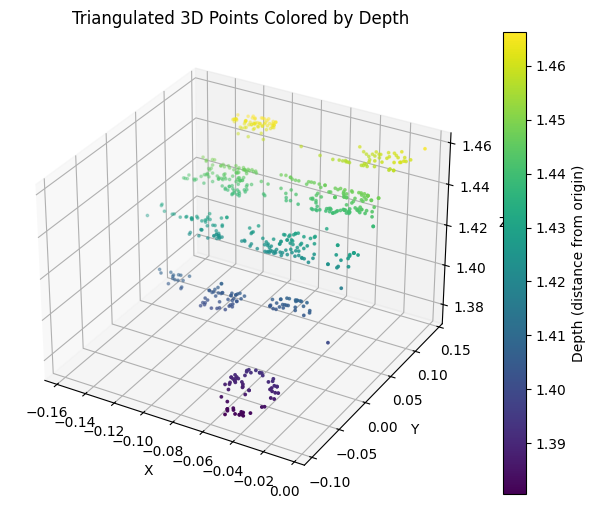

In [41]:
import numpy as np
import matplotlib.pyplot as plt

points = triangulated_points_3D.T if triangulated_points_3D.shape[0] == 3 else triangulated_points_3D

depth = np.linalg.norm(points, axis=1)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(points[:, 0], points[:, 1], points[:, 2],
                c=depth, cmap='viridis', s=3)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Triangulated 3D Points Colored by Depth")

plt.colorbar(sc, label='Depth (distance from origin)')
plt.show()
